In [5]:
import networkx as nx
from numpy.random import choice,randint
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
def create_random_graph(n,low,high):
    g = nx.generators.complete_graph(n)
    edges = [(a,b,randint(low,high)) for a,b in g.edges()]
    g.add_weighted_edges_from(edges)
    nx.draw(g)
    plt.show()
    return g

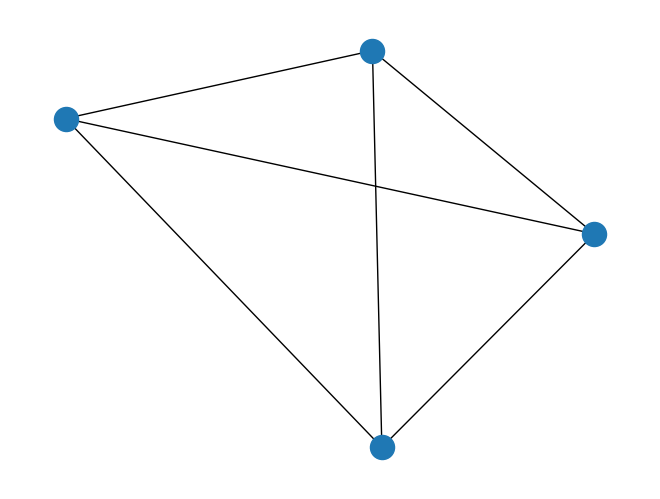

In [10]:
g = create_random_graph(4,1,20)

### Nearest neighbour

In [20]:
def nearest_neigh(g,closed_tour=False):
    curr = choice(g.nodes)
    path = []
    path.append(curr)
    not_visited = set(g.nodes) - {curr}
    while not_visited:
        curr_neigh = not_visited&set(g.neighbors(curr))
        key = lambda temp: g[curr][temp]['weight']
        curr = min(curr_neigh,key=key)
        path.append(curr)
        not_visited = not_visited - {curr}
    if closed_tour:
        path.append(path[0])
    return path
    

In [21]:
nearest_neigh(g)

[0, 2, 1, 3]

In [22]:
nearest_neigh(g,True)

[3, 0, 2, 1, 3]

### shortest edge

In [23]:
nx.get_edge_attributes(g,'weight')

{(0, 1): 16, (0, 2): 2, (0, 3): 8, (1, 2): 7, (1, 3): 9, (2, 3): 10}

In [36]:
def cycle_check(g):
    try:
        nx.find_cycle(g)
    except nx.NetworkXNoCycle:
        return False
    return True

In [37]:
def get_path(tour,closed_tour):
    path = []
    g2 = nx.Graph(tour)
    nodes = set(g2.nodes)
    while nodes:
        m = min(nodes,key=g2.degree)
        path.append(m)
        nodes = nodes - {m}

    return path

In [40]:
def shorest_edge(g,closed_tour=False):
    tour = set()
    edge_list = set(g.edges)
    visited_count = defaultdict(int)
    max_tour = len(g) if closed_tour else len(g)-1
    key = nx.get_edge_attributes(g,'weight').get
    while len(tour) < max_tour:
        u,v = min(edge_list,key=key)
        visited_count[u] += 1
        visited_count[v] += 1
        tour.add((u,v))
        edge_list.remove((u,v))
        for u,v in set(edge_list):
            if (cycle_check(nx.Graph(tour|{(u,v)})) and len(tour) != len(g)-1 or visited_count[u] == 2 or visited_count[v] == 2):
                edge_list.remove((u,v))
        
    return get_path(tour,closed_tour)

In [41]:
shorest_edge(g)

[1, 3, 0, 2]

### Partially matched crossover

In [48]:
def valid_tour(p,node):
    not_visit = set(p) - node
    indices = defaultdict(list)
    for i in range(len(p)):
        indices[p[i]].append(i)
    twice = [node for node in p if len(indices[node]) == 2]
    for i in twice:
        index = choice(indices[i])
        p[index] = not_visit.pop()
    return p


In [51]:
def partial_crossover(p1,p2):
    r = randint(0,len(p1))
    c1 = p1[:r] + p2[r:]
    c2 = p2[:r] + p1[r:]
    node = set(p2)
    return valid_tour(c1,node), valid_tour(c2,node)

In [53]:
n_pop = 8
pop = [shorest_edge(g) for _ in range(n_pop)]
selected = pop[:2]
p1,p2 = selected
partial_crossover(p1,p2)

([1, 3, 0, 2], [1, 3, 0, 2])

In [54]:
shorest_edge(g)

[1, 3, 0, 2]

### mutataion by inversion

In [56]:
def inversion(p):
    s = randint(0,len(p)-1)
    e = randint(s+1,len(p)-1)
    sub = p[s:e]
    c = p.copy()
    for i in range(s,e):
        c[i] = sub.pop()
    return c


In [61]:
c.insert(1,c.pop())

In [62]:
c

[1, 5, 2, 4, 3]